# Visualize Prediction SERA MONTH

## Imports and Functions

In [1]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, GRU, Conv1D, Flatten, Reshape

import os
import numpy as np
import sys
import tensorflow as tf
import random
import keras

SEED = 42

def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    keras.utils.set_random_seed(seed)

def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

# Call the above function with seed value
set_global_determinism(seed=SEED)

In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

FIRST_YEAR= 1972
FREQUENCY= "monthly"

c:\Users\marti\Desktop\data\hw_extra


In [3]:
folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    PredictionExperiment,
    PredictionModel,
    get_info_experiment,
    SERA
)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
indices_of_interest = ["HWN", "HWF", "HWD", "HWM", "HWA"]
bounds = (-1.1692892810242344, -0.30647585455315646, 4.561547586528888, 6.499969486244418)

## Chile good predictions per season

In [5]:
region="chile"
metadata = pd.read_csv(f"data/climate_features/{region}/metadata.csv")
metadata.reset_index(inplace=True, drop=True)
display(metadata)

,id,filename,season,indices
0,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
1,978f49d7,predictor_978f49d7_2.parquet,2,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
2,978f49d7,predictor_978f49d7_3.parquet,3,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
3,978f49d7,predictor_978f49d7_4.parquet,4,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
4,978f49d7,predictor_978f49d7_5.parquet,5,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
...,...,...,...,...
247,458d357c,predictor_458d357c_8.parquet,8,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
248,458d357c,predictor_458d357c_9.parquet,9,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
249,458d357c,predictor_458d357c_10.parquet,10,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
250,458d357c,predictor_458d357c_11.parquet,11,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...


### January

In [6]:
ids_to_execute = ["978f49d7"]
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
43701738,index_43701738.parquet,anom,1,SP,282|290|-34|-30,1980-2010,1972-2022
e306f58b,index_e306f58b.parquet,anom,1,SP,282|290|-38|-34,1980-2010,1972-2022
e601b072,index_e601b072.parquet,anom,1,SP,282|290|-43|-38,1980-2010,1972-2022
ecaf68aa,index_ecaf68aa.parquet,anom,1,SP,282|290|-56|-43,1980-2010,1972-2022
711b08fc,index_711b08fc.parquet,max,1,SP,220|280|-35|-10,NoRef,1972-2022
89595d7b,index_89595d7b.parquet,anom,1,U10,282|290|-37|-30,1980-2010,1972-2022
PDO,pdo.dat,EOF,1,SSTAnom,110|260|20|70,unknown,1972-2022


In [ ]:
k=0
season = 1
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["CNNRNN16"], 5, id, loss_fn=SERA(bounds=bounds,T=100))
    experiment_1.execute_experiment(label_plot="HWM")

NameError: name 'ids_to_execute' is not defined

## December

In [8]:
ids_to_execute = ["ecf2577f"]
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
1f3bbd82,index_1f3bbd82.parquet,normdiff,MSL,vaguada|config,NoRef,1972-2022,NaN
aac61eb2,index_aac61eb2.parquet,normalized,ADV,268|283|-32|-20,1972-2024,1972-2022,NaN
bf935817,index_bf935817.parquet,normalized,ADV,282|286|-42|-33,1972-2024,1972-2022,NaN
80ce3764,index_80ce3764.parquet,bloqueo,U|MSL,bloqueo|norte|boxes,1980-2010,1972-2022,NaN
d6188e35,index_d6188e35.parquet,bloqueo,U|MSL,bloqueo|sur|boxes,1980-2010,1972-2022,NaN
74b64e71,index_74b64e71.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
e08793a9,index_e08793a9.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
15f248b7,index_15f248b7.parquet,anom,1,T,286|288|-42|-33,1980-2010,1972-2022
f00694af,index_f00694af.parquet,max,1,MSL,260|284|-44|-17,1980-2010,1972-2022


Executing ecf2577f iter 1
Train predicting  12 MLP16
Epoch 1/200
6/6 [==============================] - 16s 625ms/step - loss: 13.3320 - val_loss: 23.2237
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 11.7721 - val_loss: 22.5021
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 11.9953 - val_loss: 21.7517
Epoch 4/200
6/6 [==============================] - 0s 8ms/step - loss: 10.7866 - val_loss: 21.1039
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 10.9466 - val_loss: 20.5525
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 10.6586 - val_loss: 20.0016
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 10.9613 - val_loss: 19.4949
Epoch 8/200
6/6 [==============================] - 0s 8ms/step - loss: 11.1807 - val_loss: 19.0712
Epoch 9/200
6/6 [==============================] - 0s 8ms/step - loss: 9.9403 - val_loss: 18.6317
Epoch 10/200
6/6 [==============================] - 0s

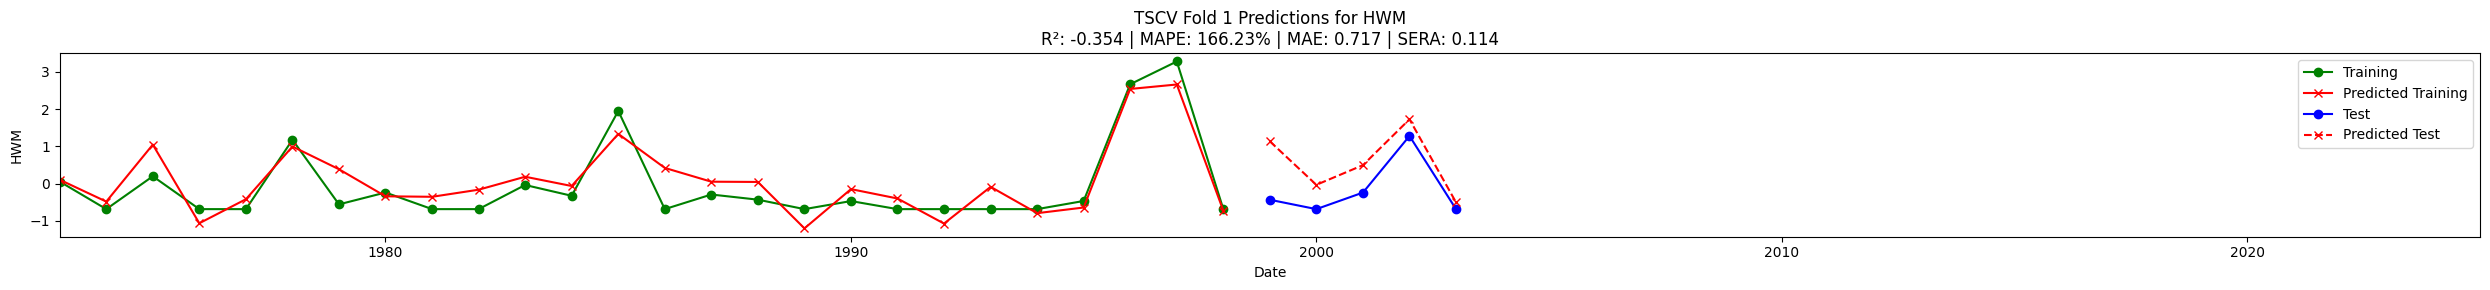

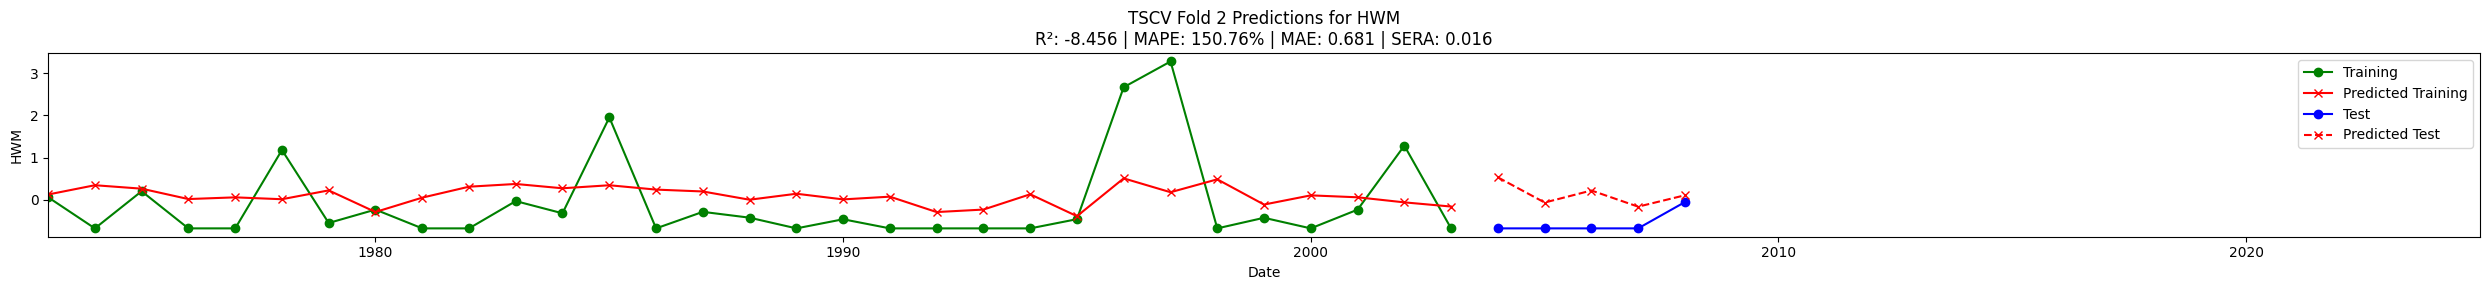

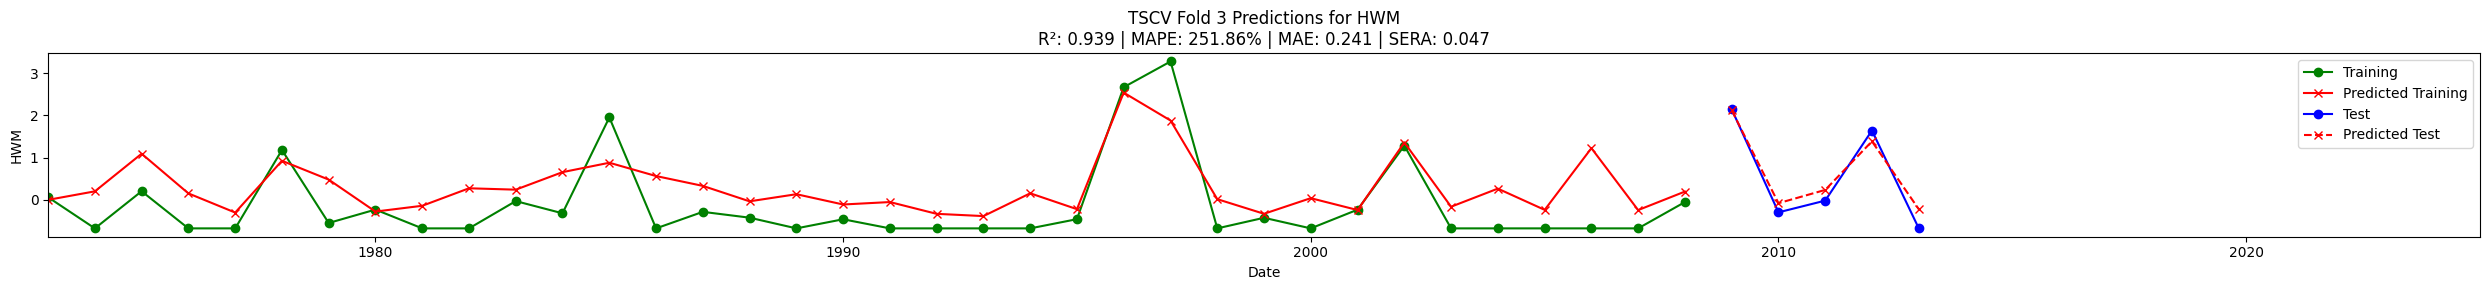

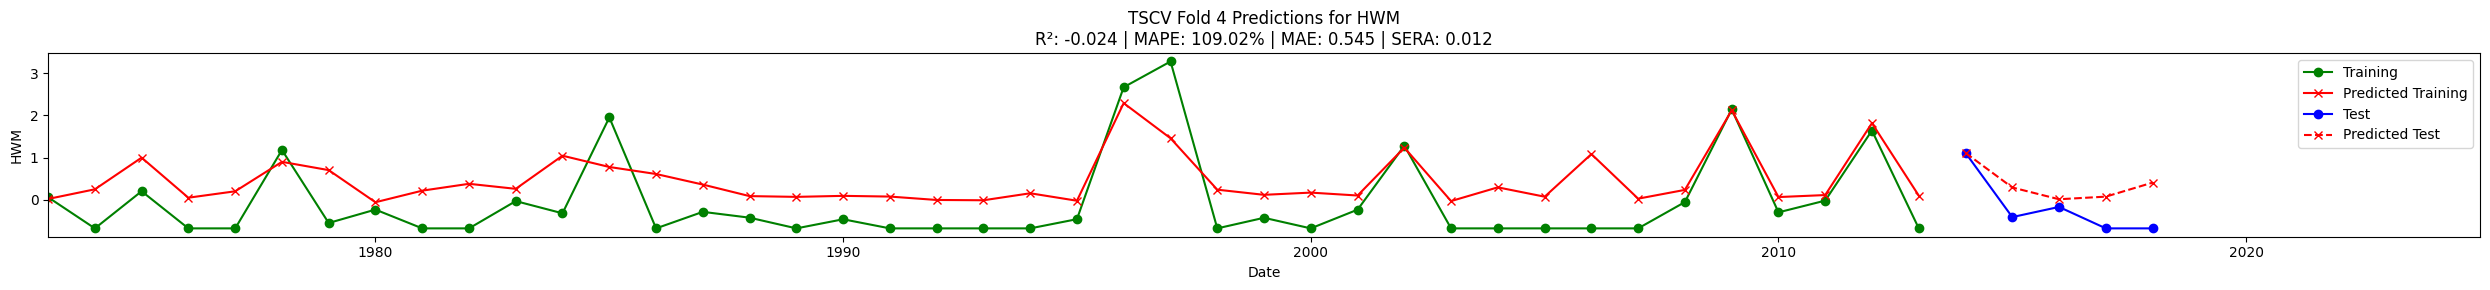

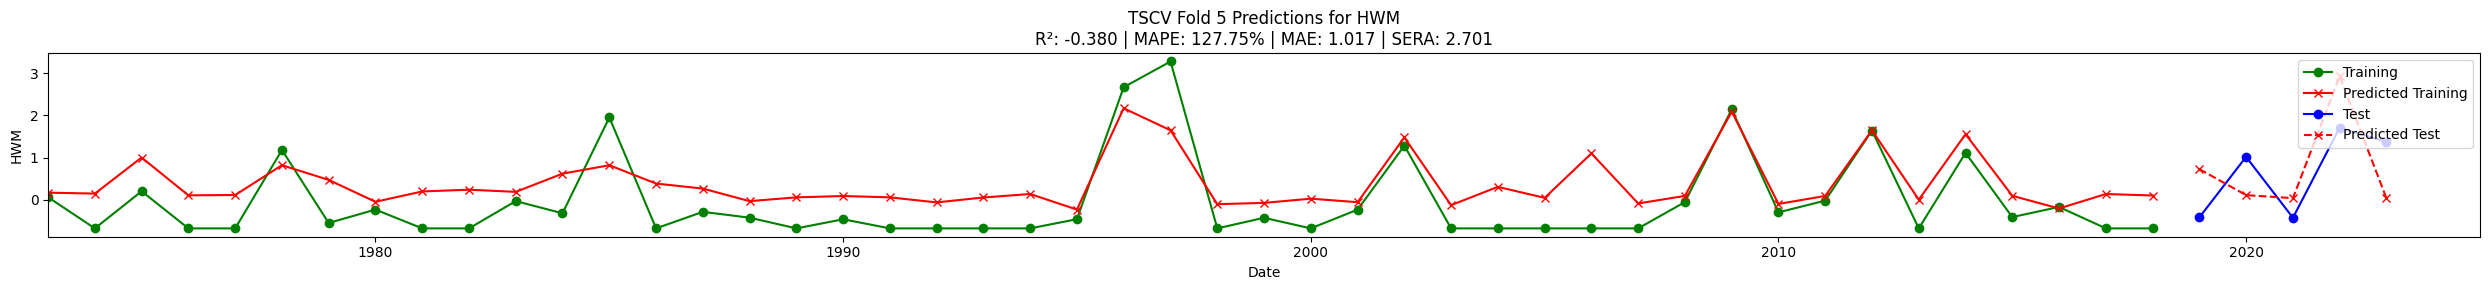

In [ ]:
k=0
season = 1
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["CNNRNN16"], 5, id, loss_fn=SERA(bounds=bounds,T=100))
    experiment_1.execute_experiment(label_plot="HWM")